# Plots for my PhD Thesis

All those plots come from my different researches. The intention is to have them coherently designed.

### Required packages and Constants

In [21]:
using HDF5, PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [22]:
L_FSIZE = 16
T_FSIZE = 14
CMAP = "viridis"
CMAP_R = "viridis_r"
HG = 3.5 #inches
WD = 5 #inches
LWD = 1.5; #points
BAR_BLUE = (0.4,0.6,0.8)
BG_GREY = "0.95"

"0.95"

## Plots for the background in Quantum Metrology

In [23]:
function plotBG_histogram_bin1()
    
    dist = h5read("statistics.h5","histogram/treesheigths")
    x_histo, y_histo = hist(dist,9)
    fig = figure(figsize=[5,3.5])

    plt = bar(Array(x_histo)[2:end].-0.5, y_histo, width=1, facecolor= BAR_BLUE, edgecolor = BG_GREY)
    axis(xmin = 0, xmax = 12, ymax = 10);
    axes = fig[:axes][1]
    axes[:set_axis_bgcolor](BG_GREY)
    axes[:set_axisbelow](true)
    grid()
    xlabel("Height (m)")
    xlabel("Height (m)")
    ylabel("Counts #")
    xticks([0,1,2,3,4,5,6,7,8,9,10,11,12]);
    savefig("pdf/BG_hist_bin_1.pdf", bbox_inches="tight")
    
end

plotBG_histogram_bin1 (generic function with 1 method)

In [24]:
function plotBG_histogram_bin2()
    
    dist = h5read("statistics.h5","histogram/treesheigths")

    x_histo, y_histo = hist(dist,5)
    fig = figure(figsize=[5,3.5]) 
    plt = bar(Array(x_histo)[2:end].-1.5, y_histo, width=2, facecolor= BAR_BLUE, edgecolor = BG_GREY)
    axis(xmin = 0, xmax = 13, ymax = 10);
    axes = fig[:axes][1]
    axes[:set_axis_bgcolor](BG_GREY)
    axes[:set_axisbelow](true)
    grid()
    xlabel("Height (m)")
    xlabel("Height (m)")
    ylabel("Counts #")
    xticks([1.5,3.5,5.5,7.5,9.5,11.5]);
    savefig("pdf/BG_hist_bin_2.pdf", bbox_inches="tight")
    
end

plotBG_histogram_bin2 (generic function with 1 method)

## Plot for accuracy bound in the vicinity of Dicke states

Those plots come from an analytical formula so the data is generated on the fly.

The magnetic field is along $Y$ direction, $H=\gamma J_y$

In [25]:
function plotVD_evolution_example() 
    
    filenames = h5read("plotsData.h5","VicinityDicke/EvolutionExample/bloch_filename_array")
    states = h5read("plotsData.h5","VicinityDicke/EvolutionExample/dicke_x_N16_state_array")
    
    (fig, axarr) = subplots(2, 5)
    
    fig[:set_size_inches](11,4)

    for i in 1:2
        for j in 1:5
            if i == 1
                    
                axarr[i,j][:imshow](imread(filenames[j]),interpolation="bilinear")
                axarr[i,j][:set_axis_off]()

                axarr[i,j][:get_xaxis]()[:set_visible](false)
                axarr[i,j][:get_yaxis]()[:set_visible](false)
                
            else
                
                axarr[i,j][:bar](Array(-8:8)-0.5, real(map(abs2, states[:,j])),
                    width=1, facecolor= BAR_BLUE, edgecolor = BG_GREY)
                axarr[i,j][:set_ylim]([0.,1.1])
                axarr[i,j][:set_xlim]([-9,9])
                axarr[i,j][:set_xticks]([-8,-4,0,4,8])
                if j != 1 
                    setp(axarr[i,j][:get_yticklabels](),visible=false) 
                else 
                    axarr[i,j][:set_xlabel](L"|m\rangle_{x}")
                end
                axarr[i,j][:set_axis_bgcolor](BG_GREY)
                axarr[i,j][:set_axisbelow](true)
                axarr[i,j][:grid]()
                
            end
        end
    end
    
    fig[:subplots_adjust](wspace=0.02, hspace=0)
    
    savefig("pdf/VD_evolution_of_dicke.pdf", bbox_inches="tight")
end

plotVD_evolution_example (generic function with 1 method)

### Plot evolution

In [26]:
function plotVD_precisionOnTheta()
    
    # Open data group of the plot
    group = g_open(h5open("plotsData.h5"),"VicinityDicke/PrecisionOverTheta")
    
    theta = d_read(group,"theta")
    precision = d_read(group, "precision")

    theta_max = a_read(group,"theta_max")
    precision_max = a_read(group,"precision_max")

    fig = figure(figsize=(5,3.5))
    xl = xlabel(L"$\Theta$ [A.U.]", fontsize=L_FSIZE)
    yl = ylabel(L"$(\Delta \Theta)^{-2}/N$", fontsize=L_FSIZE)
    xticks(rotation=45)

    ax = axis(xmin=minimum(theta), xmax=maximum(theta))

    # SN thresold
    bar(minimum(theta),1,maximum(theta),0, color="0.9", 
        edgecolor="0.7",linewidth=0)
    plot([minimum(theta),maximum(theta)],
        [1,1], color="0.7", linewidth=LWD, linestyle="dotted")

    plot([theta_max,theta_max],[0,precision_max],
        "--r", linewidth=LWD)
    plt = plot(theta,precision,linewidth=LWD)


    savefig("pdf/VD_precision_theta.pdf", bbox_inches="tight")
    
end

plotVD_precisionOnTheta (generic function with 1 method)

### Plot versus QFI of known states

In [36]:
function plotVD_againstSPSQ()
    
    # Open data group of the plot
    group = g_open(h5open("plotsData.h5"),"VicinityDicke/Comparison")
    
    parameter = d_read(group,"spsq_parameter")
    quantumFI = d_read(group,"spsq_qfi")
    precision = d_read(group,"spsq_opt_prec")

    fig = figure(figsize=(5,3.5))
    xl = xlabel(L"$\lambda$ [A.U.]", fontsize=L_FSIZE)
    yl = ylabel(L"(\Delta \Theta)^{-2}/N", fontsize=L_FSIZE)
    xticks([0,0.1,0.2,0.3,0.4])
    
    ax = axis(xmin=0, xmax=maximum(parameter), ymin=0, ymax=140)

    plot(parameter,quantumFI,"--r", linewidth=LWD,label=L"\mathcal{F}\,[\rho_\lambda,J_z]")
    plot(parameter,precision,linewidth=LWD,label=L"(\Delta \Theta)^{-2}/N")
    legend(frameon=false)

    savefig("pdf/VD_against_spsq.pdf", bbox_inches="tight")
    
end

plotVD_againstSPSQ (generic function with 1 method)

In [35]:
function plotVD_againstTherm()
    
    # Open data group of the plot
    group = g_open(h5open("plotsData.h5"),"VicinityDicke/Comparison")
    
    parameter = d_read(group,"therm_parameter")
    quantumFI = d_read(group,"therm_qfi")
    precision = d_read(group,"therm_opt_prec")

    fig = figure(figsize=(5,3.5))
    xl = xlabel(L"$T$ [A.U.]", fontsize=L_FSIZE)
    yl = ylabel(L"(\Delta \Theta)^{-2}/N", fontsize=L_FSIZE)

    ax = axis(xmin=0, xmax=maximum(parameter))

    plot(parameter,quantumFI,"--r", linewidth=LWD,label=L"\mathcal{F}\,[\rho_T,J_z]")
    plot(parameter,precision,linewidth=LWD,label=L"(\Delta \Theta)^{-2}/N")
    legend(frameon=false)

    savefig("pdf/VD_against_therm.pdf", bbox_inches="tight")
    
end

plotVD_againstTherm (generic function with 1 method)

### Plot contour

In [29]:
function plotVD_exper_area()
    
    dataFile = h5open("plotsData.h5")
    dataGroup = g_open(dataFile, "VicinityDicke/Experimental")
    
    # Read all atributes
    n = a_read(dataGroup, "N")
    ex_jx2  = a_read(dataGroup, "Jx^2")
    ex_jy2  = a_read(dataGroup, "Jy^2")/(n*(n+2)/8)
    err_jx2 = a_read(dataGroup, "Jx^2 error")
    err_jy2 = a_read(dataGroup, "Jy^2 error")/(n*(n+2)/8)
    
    # Read data for the plot & apply normalizations
    y = d_read(dataGroup, "area_jx2")
    x = d_read(dataGroup, "area_jy2")/(n*(n+2)/8)
    z = d_read(dataGroup, "area_precs").^(-1)/n
    z[1:end,1] = zeros(1,length(x))
    
    ln = 15
    map!(z -> if z > ln || isnan(z) 15 else z end,z);

    fig = figure(figsize=(6,3.5))

    ylabel(L"$\langle J_x^2\rangle$", fontsize=L_FSIZE)
    xlabel(L"$\langle J_y^2\rangle / J_{\rm max}$", fontsize=L_FSIZE)

    im = imshow(z, cmap="viridis_r", interpolation="bilinear",
    origin="lower", extent=[0,1,0,400], aspect=1/400*4/5)

    c = contour(x,y,z,ln-1,colors="k")
    clabel(c, fmt="%1.0f", manual=[(0.7,250),(0.9,250),(0.6,60),(0.95,130),(0.92,90)])
    cb = colorbar(im, ticks=Array(0:ln))
    cb[:ax][:set_yticklabels](vcat(map(string, Array(0:ln-1)),">$ln"))
    
    plot([ex_jy2,ex_jy2],[0, maximum(y)], "k--", lw=LWD)
    
    plot([ex_jy2], [ex_jx2], "k+", markersize=12, mew=LWD)
    
    e = patch.Ellipse([ex_jy2,ex_jx2], 2*err_jy2, 2*err_jx2, 
    fc=BAR_BLUE, ec="k", ls=":", lw=LWD, alpha=0.8)
    
    fig[:axes][1][:add_patch](e)

    savefig("pdf/VD_exper_contour.pdf", bbox_inches="tight")
    close(dataFile)
end

plotVD_exper_area (generic function with 1 method)

In [30]:
function plotVD_exper_slice()
    
    dataFile = h5open("plotsData.h5")
    dataGroup = g_open(dataFile, "VicinityDicke/Experimental")
    
    # Read all atributes
    n = a_read(dataGroup, "N")
    ex_jx2  = a_read(dataGroup, "Jx^2")
    ex_jy2  = a_read(dataGroup, "Jy^2")/(n*(n+2)/8)
    ex_precs= a_read(dataGroup, "Precision")
    err_jx2 = a_read(dataGroup, "Jx^2 error")
    err_jy2 = a_read(dataGroup, "Jy^2 error")/(n*(n+2)/8)
    ellipse_precs = a_read(dataGroup, "Error-ellipse's precision (Vector)")
    
    # Read data for the plot & apply normalizations
    x = d_read(dataGroup, "slice_jx2")
    y = d_read(dataGroup, "slice_precs").^(-1)/n

    fig = figure(figsize=(5,3.5))
    xl = xlabel(L"\langle J_x^2 \rangle", fontsize=L_FSIZE)
    yl = ylabel(L"$(\Delta \Theta)^{-2}/N$", fontsize=L_FSIZE)

    axis(xmin=0, xmax=maximum(x), ymin=0.1, ymax=3500)

    # Set Logarithmic Y and grid
    ax = fig[:get_axes]()[1]
    ax[:set_yscale]("log")
    ax[:set_yticks]([1,3,10,100,1000,3000])
    ax[:set_yticklabels]([1,3,10,100,1000,3000])
    ax[:yaxis][:grid](true)
    
    # SN thresold
    bar(minimum(x),0.9,maximum(x),0.1, color="0.9", 
        edgecolor="0.7",linewidth=0)
    plot([minimum(x),maximum(x)],
        [1,1], color="0.7", linewidth=LWD, linestyle=":")

    # Optimal precision
    plt = plot(x,y,linewidth=LWD)
    
    # Experimental data
    hlines(ex_precs^(-1)/n, ex_jx2-err_jx2,ex_jx2+err_jx2,lw=1.25)
    hlines(1/maximum(ellipse_precs)/n, ex_jx2-4,ex_jx2+4,lw=1.25)
    hlines(1/minimum(ellipse_precs)/n, ex_jx2-4,ex_jx2+4,lw=1.25)
    vlines(ex_jx2, 1/maximum(ellipse_precs)/n, 1/minimum(ellipse_precs)/n, lw=1.25)
    vlines(ex_jx2-err_jx2, ex_precs^(-1)/n-0.45,ex_precs^(-1)/n+0.57,lw=1.25)
    vlines(ex_jx2+err_jx2, ex_precs^(-1)/n-0.45,ex_precs^(-1)/n+0.57,lw=1.25)
    plot(ex_jx2,ex_precs^(-1)/n, "wo", markersize=8, mew=LWD)

    savefig("pdf/VD_exper_slice.pdf", bbox_inches="tight")
    
    close(dataFile)
    
end

plotVD_exper_slice (generic function with 1 method)

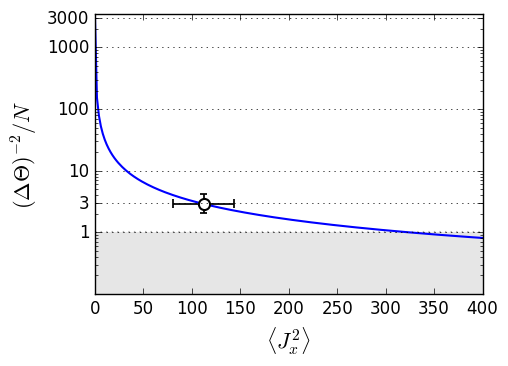

In [31]:
plotVD_exper_slice()

## Plots for the Optimal Bounds for QFI

Get image for the spin-squeezing bound from blender(c), still it is not possible to do this on matplotlib. This is because the smoothness needed at the border. Image file `data/LT_spsq2d_4.png`.

### Op. bound for spin-squeezing inequality 

In [32]:
function plotLT_spsq2d()
    
    dataFile = h5open("plotsData.h5")
    dataGroup = g_open(dataFile,"OptimalBound/SpinSqueezing")

    precision = read(dataGroup["precision"]);
    x_sql = read(dataGroup["x_sql_bound"])
    y_sql = read(dataGroup["y_sql_bound"])

    x_bound = read(dataGroup["x_bound"])
    y_bound = read(dataGroup["y_bound"])

    XLim = read(attrs(dataGroup)["XLim"]);
    YLim = read(attrs(dataGroup)["YLim"]);

    figure(figsize=(6,3.5))

    xlabel(L"\langle J_x \rangle",fontsize=L_FSIZE)
    ylabel(L"(\Delta J_y)^2",fontsize=L_FSIZE)

    im = imshow(precision, cmap=CMAP_R ,aspect=1/2*4/5, extent=[0,2,0,4])
    sql_line = plot(x_sql, y_sql, "k--", LineWidth = LWD)
    boundary_line = plot(x_bound, y_bound, "k", LineWidth =1.25)

    cb = colorbar(im, ticks=Array(linspace(0,1,4)))
    cb[:ax][:set_yticklabels](vcat(map(string, Array(0:3))))

    savefig("pdf/LT_spsq2d_4.pdf", bbox_inches="tight")
    close(dataGrou)
    
end

plotLT_spsq2d (generic function with 1 method)

## PLOTS 

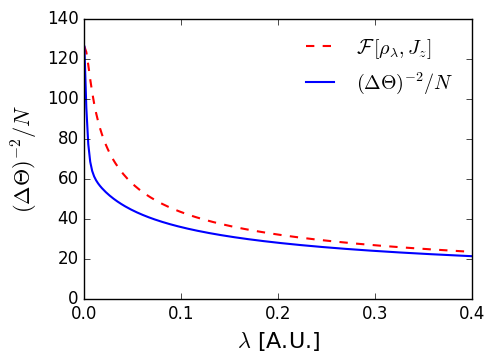

In [37]:
plotVD_againstSPSQ()

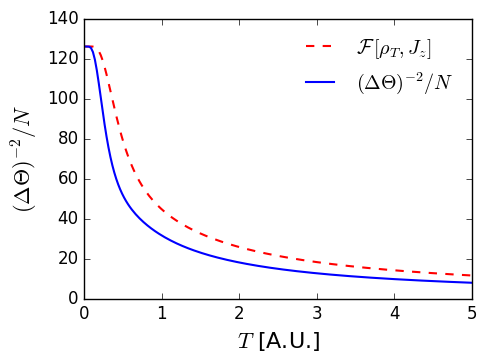

In [38]:
plotVD_againstTherm()

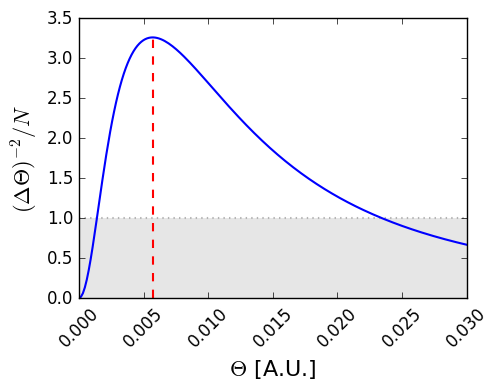

In [22]:
plotVD_precisionOnTheta()

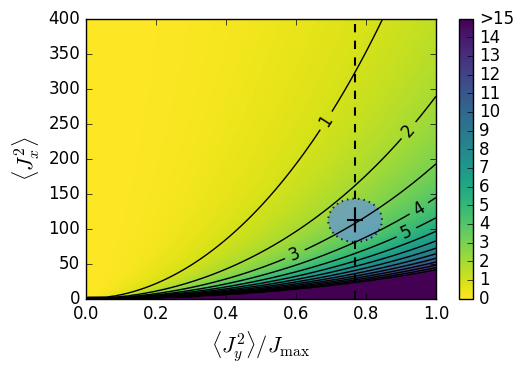

In [25]:
plotVD_exper_area()

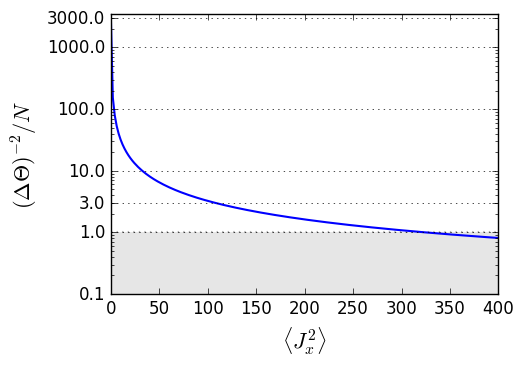

In [35]:
plotVD_exper_slice()

In [39]:
echo Hello

LoadError: LoadError: syntax: "%" is not a unary operator
while loading In[39], in expression starting on line 1

In [44]:
@pyimport qutip

LoadError: LoadError: PyError (:PyImport_ImportModule) <type 'exceptions.ImportError'>
ImportError('No module named qutip',)

while loading In[44], in expression starting on line 364

In [45]:
Pkg.add("Debug")

INFO: Cloning cache of Debug from https://github.com/toivoh/Debug.jl.git
INFO: Installing Debug v0.1.6
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Debug
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [46]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of PyCall...
INFO: Computing changes...
INFO: Upgrading PyCall: v1.6.0 => v1.6.1
INFO: Building PyCall
INFO: PyCall is using /usr/bin/python (Python 2.7.11) at /usr/bin/python, libpython = /usr/lib64/libpython2.7.so


false

  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/iapellaniz/.julia/v0.5/IJulia/src/kernel.jl:31
